In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [198]:
def mse(a, b):
    return np.mean( (a-b)**2 )

# Sample Setting

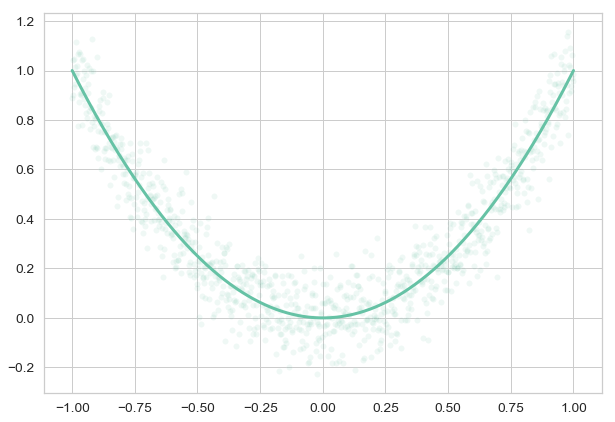

In [199]:
n_res = 1000
min_x = -1
max_x = 1
x = np.linspace(min_x, max_x, n_res)
# parabola
f = lambda x: x**2
y = f(x)
noise = np.random.randn(n_res)/10
y_noise = y + noise

fig = plt.figure(figsize=(10, 7))
sns.lineplot(x, y)
sns.scatterplot(x, y_noise, alpha=0.1)

# Model Sample Setting

In [200]:
sample_size = 2
num_repeat = 1000


x_sample_list = []
y_sample_list = []
y_noise_sample_list = []

for i in range(num_repeat):
    sample_ind = np.random.randint(0, n_res, sample_size)
    ind_unique = np.unique(sample_ind).shape[0] == sample_size
    while not(ind_unique):
        sample_ind = np.random.randint(0, n_res, sample_size)
        ind_unique = np.unique(sample_ind).shape[0] == sample_size
    x_sample_list.append(np.take(x, sample_ind))
    y_sample_list.append(np.take(y, sample_ind))
    y_noise_sample_list.append(np.take(y_noise, sample_ind))
    

x_sample_list = np.array(x_sample_list)
y_sample_list = np.array(y_sample_list)
y_noise_sample_list = np.array(y_noise_sample_list)

noise_mode = False
if noise_mode == True:
    y_sample_list = y_noise_sample_list

# Constant model

In [201]:
# weight ของ const model
const_weights = np.mean(y_sample_list, axis=1)
avg_const_weight = np.mean(const_weights)

avg constant-model weight: 0.32383


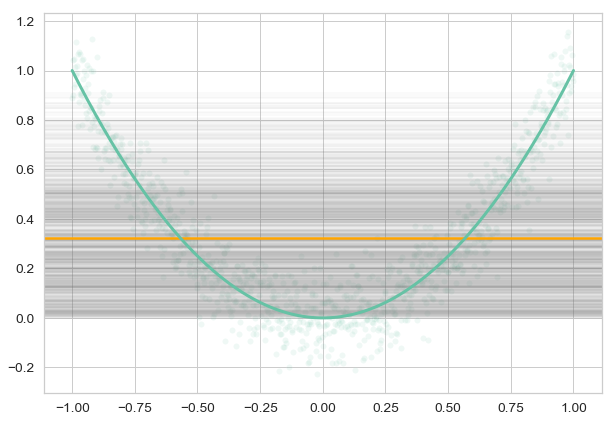

In [202]:
# plot weight
fig = plt.figure(figsize=(10, 7))
for w in const_weights:
    plt.axhline(w, alpha=0.05, linewidth=1.5, color='grey')
# plot mean weight 
plt.axhline(avg_const_weight, linewidth=2.5, color='orange')
sns.lineplot(x, y)
sns.scatterplot(x, y_noise, alpha=0.1)
print(f'avg constant-model weight: {np.round(avg_const_weight, 5)}')

## Calculate Bias and Variance of Const-Model

In [203]:
bias = mse(y, avg_const_weight)
print(f'bias = {round(bias, 5)}')
print(f'bias (from exam) = {round(4/45, 5)}')

bias = 0.08935
bias (from exam) = 0.08889


In [204]:
variance = mse(
    np.repeat(avg_const_weight, num_repeat), const_weights
)

print(f'variance = {round(variance, 5)}')
print(f'variance (from exam) = {round(2/45, 5)}')

variance = 0.04366
variance (from exam) = 0.04444


# Linear Model

## random sample
## $$ (x_1, y_1) and (x_2, y_2) $$

## $$g_{linear}= ax    ; a = (x_1 + x_2)$$

In [205]:
lin_weights = np.sum(x_sample_list, axis=1)
avg_lin_weight = np.mean(lin_weights)

lin_model = lambda x, w: w*x

avg linear-model weight: -0.01109


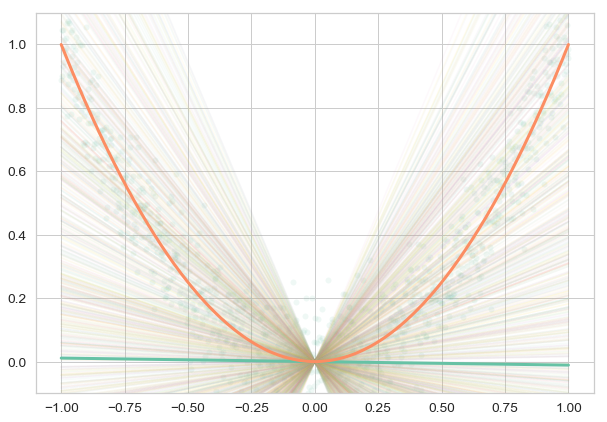

In [212]:
fig = plt.figure(figsize=(10, 7))
x_rescale = np.linspace(min_x, max_x, int(n_res/10))
for w in lin_weights:
    sns.lineplot(x_rescale, lin_model(x_rescale, w), alpha=0.05, linewidth=1.5)

sns.lineplot(x_rescale, lin_model(x_rescale, avg_lin_weight))
sns.lineplot(x, y)
sns.scatterplot(x, y_noise, alpha=0.1)
plt.axis([-1.1, 1.1, -0.1, 1.1])
print(f'avg linear-model weight: {np.round(avg_lin_weight, 5)}')

## Calculate Bias and Variance of Linear-Model

In [218]:
bias = mse(x*avg_lin_weight, y)
print(f'bias = {round(bias, 5)}')
print(f'bias (from exam) = {round(1/5, 5)}')

bias = 0.20084
bias (from exam) = 0.2


In [221]:
lin_predicted = []
for w in lin_weights:
    lin_predicted.append(lin_model(x, w))
lin_predicted = np.array(lin_predicted)

In [224]:
variance = mse(
    np.repeat([lin_model(x, avg_lin_weight)], num_repeat, axis=0), lin_predicted
)

print(f'variance = {round(variance, 5)}')
print(f'variance (from exam) = {round(1/3, 5)}')

variance = 0.19599
variance (from exam) = 0.33333
